# **Adult Income DataSet Analysis:**

**Source:** __https://www.kaggle.com/datasets/wenruliu/adult-income-dataset__

```Description from Kaggle
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.
```

In [1]:
# Necessary Imports: 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/07_Adult_Income_DataSet.csv")

In [3]:
data.shape

(48842, 15)

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

If we were to use this dataset for machine learning then, `income` will be the Dependent Variable and all the other variables will be Independent variables.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

So, the great news is that, non of the values in this dataset are `Null` or `Not a Number`.

In [8]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Display 10 random samples:
data.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
29580,44,Private,214838,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,>50K
2122,52,?,91447,Bachelors,13,Widowed,?,Not-in-family,White,Female,0,2205,8,United-States,<=50K
36173,46,Private,309212,HS-grad,9,Divorced,Priv-house-serv,Not-in-family,White,Female,0,0,25,United-States,<=50K
19657,35,Self-emp-not-inc,462890,10th,6,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,50,United-States,<=50K
20515,31,Private,73796,Some-college,10,Widowed,Exec-managerial,Unmarried,White,Female,0,0,30,United-States,<=50K
10072,30,Private,136832,9th,5,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
13000,40,Private,154374,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
31675,47,Private,144351,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
39323,23,Private,293565,10th,6,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
38333,52,Private,191529,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1740,60,United-States,<=50K


---

In [10]:
# Number of Rows and Columns: 
print(F"Number of Rows:{data.shape[0]}")
print(F"Number of Columns:{data.shape[1]}")

Number of Rows:48842
Number of Columns:15


---

In [11]:
# 50% of Random Samples:
data.sample(frac= 0.50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
43317,17,Private,182158,10th,6,Never-married,Priv-house-serv,Own-child,White,Male,0,0,30,United-States,<=50K
19020,41,Private,194710,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
17341,43,Self-emp-not-inc,277647,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,35,United-States,<=50K
14744,24,Private,200207,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
9041,51,Local-gov,205100,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,32,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,23,Private,65225,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
43575,37,Private,216924,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,44,United-States,>50K
3141,38,Private,59660,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
5752,26,Self-emp-not-inc,109162,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,25,United-States,<=50K


---

In [12]:
# # 50% of Random Samples with Random State:
data.sample(frac= 0.50, random_state= 100).head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K


---

<Axes: >

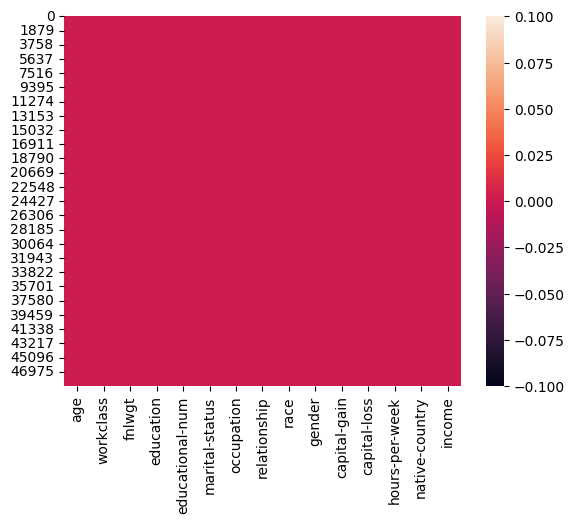

In [13]:
sns.heatmap(data.isnull())

There are not Null values in the dataset so the HeatMap is whole read which is the color for 0 as seen in the above plot.

-----

In [14]:
# Perform Data Cleaning (Replace ? with NaN):
data.isin(["?"])

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


If we try to replace `?` with `np.nan`, then it will not work as we are trying to replace `?` with `np.nan` where this is no such `?` in `Boolean DataFrame`.

In [15]:
data.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [16]:
data.replace("?", np.nan,inplace= True)

In [17]:
data.isin(["?"]).sum()
# So the replacement is successful.

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

---

In [18]:
# Cheking for Null values as they should be there:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<Axes: >

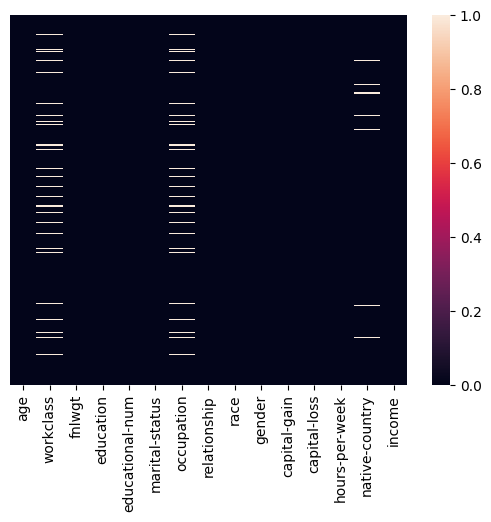

In [19]:
# Visualizing the null values:

sns.heatmap(data.isnull(), yticklabels=False)

---

In [20]:
# Figure out the null values by percentage:
data.isnull().sum()* 100/len(data)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [21]:
# Drop all Missing values:
data.dropna(inplace= True)

In [22]:
data.shape

(45222, 15)

In [23]:
# Check for Duplicate data and drop them: 
data.duplicated().sum()

np.int64(47)

So, 47 Duplicated rows.

In [24]:
data.drop_duplicates(inplace= True)

In [25]:
data.duplicated().sum()

np.int64(0)

---

In [26]:
# get the overall statistics of the dataset:
data.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


---

In [27]:
# Drop the columns education-num and capital-loss:
data.drop(["educational-num", "capital-loss"], axis= 1, inplace=True)

In [28]:
data.shape

(45175, 13)

In [29]:
# drop capital gain column: 
data.drop(["capital-gain"], axis= 1, inplace=True)

In [30]:
data.shape

(45175, 12)

In [31]:
data.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K


---

## **Univariate Analysis:**

In [32]:
# What  is the distribution of age column:

print(data["age"].describe())

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


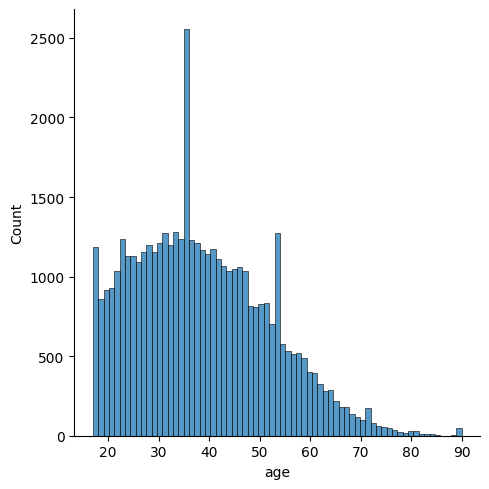

In [33]:
sns.displot(data["age"])

<Axes: >

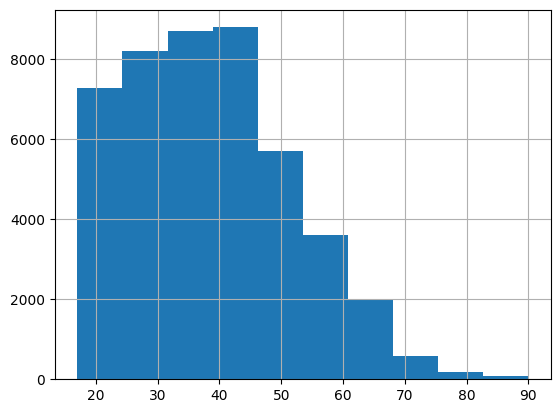

In [34]:
data["age"].hist()

----

In [35]:
# find the total number of persons havibg age between 17 to 48 inclusive:
sum((data["age"]>=17) & (data["age"]<= 48))

34858

In [36]:
# find the total number of persons having age between 17 to 48 inclusive:
sum(data["age"].between(left= 17, right= 48, inclusive= 'both'))

34858

---

<Axes: >

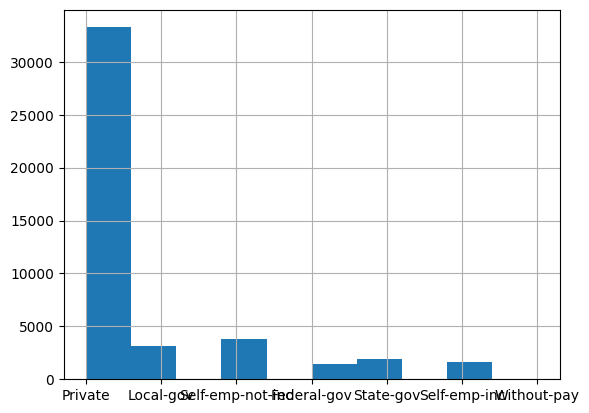

In [37]:
# What is the distribution of workclass column: 
data["workclass"].hist()

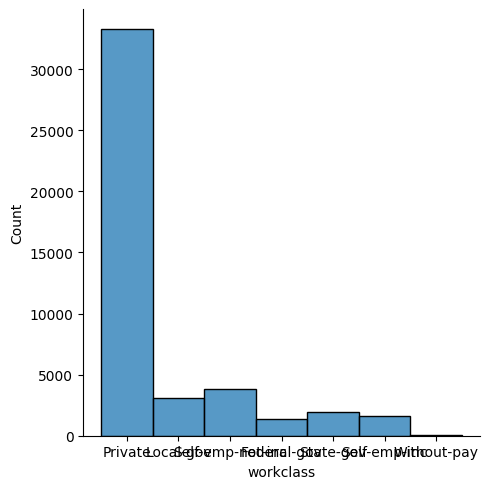

In [38]:
# What is the distribution of workclass column: 
sns.displot(data["workclass"])

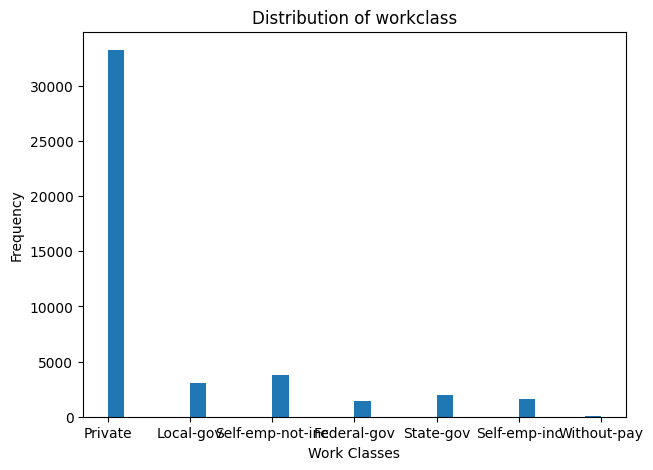

In [39]:
# What is the distribution of workclass column: 
fig= plt.figure(figsize= (7,5))
plt.hist(data["workclass"], bins=30)
plt.title("Distribution of workclass")
plt.xlabel("Work Classes")
plt.ylabel("Frequency")
plt.show()

In [40]:
data.shape

(45175, 12)

----

In [41]:
# how many persons have bacheolers or masters degree:
data.columns
((data["education"] =="Bacheolers") | (data["education"]=="Masters")).sum()

np.int64(2513)

In [42]:
data[(data["education"] =="Bacheolers") | (data["education"]=="Masters")].shape[0]

2513

In [43]:
len(data[data["education"].isin(["Bacheolers", "Masters"])])

2513

In [44]:
data["education"].isin(["Bacheolers", "Masters"]).sum()

np.int64(2513)

---

## **Bi-Variate Analysis:**

In [45]:
data.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

<Axes: xlabel='income', ylabel='age'>

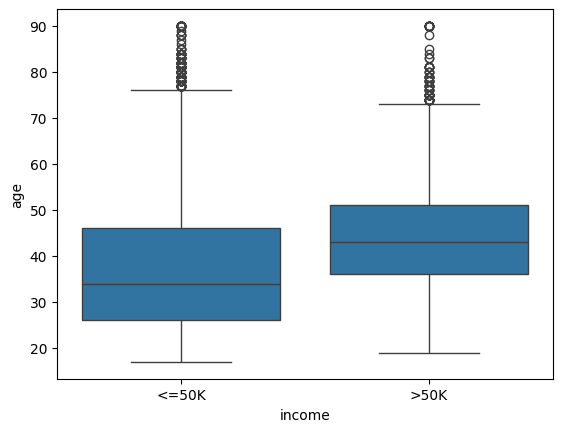

In [48]:
# Relationship between Salary and Age:
sns.boxplot(x="income", y="age", data= data)

---

In [51]:
# Replace income values [<= 50K, >50k] with 0 and 1:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [52]:
data["income"].value_counts()

income
<=50K    33973
>50K     11202
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

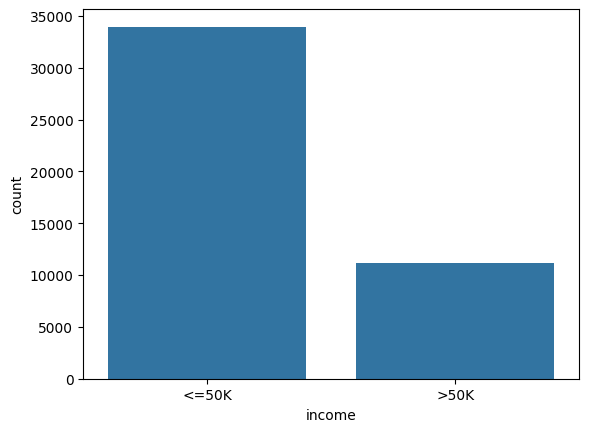

In [55]:
sns.countplot(x="income", data= data)

-----

In [ ]:
# Replacing income["<=50K, >50k"] with [0,1]:

In [ ]:
# creating a custom function: 
def to_rep(valo):
    if valo == "<=50K":
        return 0
    else: 
        return 1

In [60]:
data["encoded_salary"]= data["income"].apply(to_rep)

In [61]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'encoded_salary'],
      dtype='object')

In [62]:
data["encoded_salary"].head(10)

0     0.0
1     0.0
2     NaN
3     NaN
5     0.0
7     NaN
8     0.0
9     0.0
10    NaN
11    0.0
Name: encoded_salary, dtype: float64

In [63]:
# Or, Directly replacing:
data["income"].replace(to_replace=["<=50K", ">50K"], value= [0, 1], inplace= True)

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_14280\2615015573.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["income"].replace(to_replace=["<=50K", ">50K"], value= [0, 1], inplace= True)


---

In [64]:
# Which workclass getting the higest salary:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'encoded_salary'],
      dtype='object')

In [66]:
data["workclass"].nunique()

7

In [67]:
data["workclass"].value_counts()

workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

<Axes: xlabel='workclass', ylabel='count'>

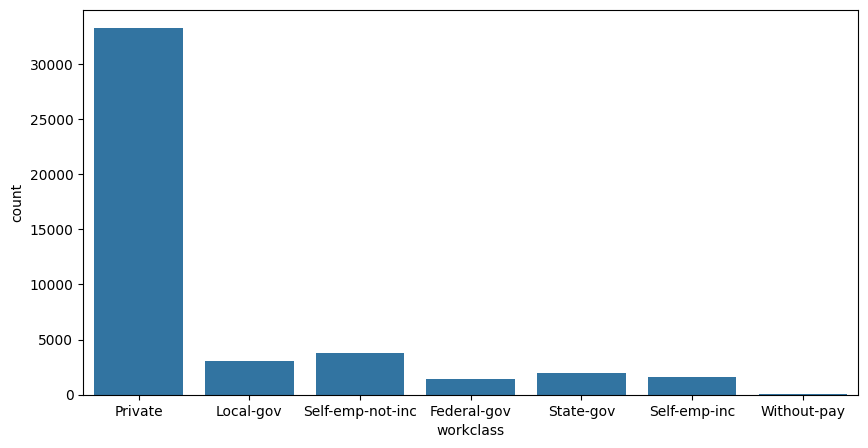

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x= data["workclass"], data= data)

In [78]:
data.groupby(by= "workclass")["income"].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

---

In [80]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'encoded_salary'],
      dtype='object')

In [82]:
# who has better chance to get income>50K male or female?
data.groupby("gender")["income"].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64

----------------------------------------------------------------

In [83]:
# Convert workclass column datatype to categorical datatype:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'encoded_salary'],
      dtype='object')

In [85]:
data["workclass"]

0             Private
1             Private
2           Local-gov
3             Private
5             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 45175, dtype: object

In [88]:
data["workclass"]= data["workclass"].astype("category")

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          45175 non-null  int64   
 12  encoded_salary  33973 non-null  float64 
dtypes: category(1), float64(1), int64(4), object(7)
memory usage: 4.5+ MB
